<a href="https://colab.research.google.com/github/YelizavetaP/NN2022labs/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 4
з дисципліни "Нейронні мережі" <br>
студентки 3 курсу КН ФІТ<br>
Поповаї Єлизавети


1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST. <br>
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи. <br>
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers). <br>
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.  <br>
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb


In [35]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [36]:
import numpy as np
# 5 8 2
classes = ['Sandal','Bag', 'Pullover']

myTrain_data = []
myTrain_labels = []
myTest_data = []
myTest_labels  = []

for i in range(len(train_labels)):
  if (train_labels[i]==2 or train_labels[i]==5 or train_labels[i]==8 ):
    myTrain_data.append(train_data[i])
    myTrain_labels.append(train_labels[i])

for i in range(len(test_labels)):
  if (test_labels[i]==2 or test_labels[i]==5 or test_labels[i]==8 ):
    myTest_data.append(test_data[i])
    myTest_labels.append(test_labels[i])

my_train_data = np.array(myTrain_data)
my_train_labels = np.array(myTrain_labels)
my_test_data= np.array(myTest_data)
my_test_labels  = np.array(myTest_labels)

In [37]:

# Check the shape of our data and single example
print('Shape')
print(my_train_data.shape, my_train_labels.shape, my_test_data.shape, my_test_labels.shape)
print(my_train_data[0].shape, my_train_labels[0].shape)
print('\nData')
print(f"Training sample:\n{my_train_data[0]}\n")
print(f"Training lables:\n{my_train_labels[0]}")

Shape
(18000, 28, 28) (18000,) (3000, 28, 28) (3000,)
(28, 28) ()

Data
Training sample:
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 

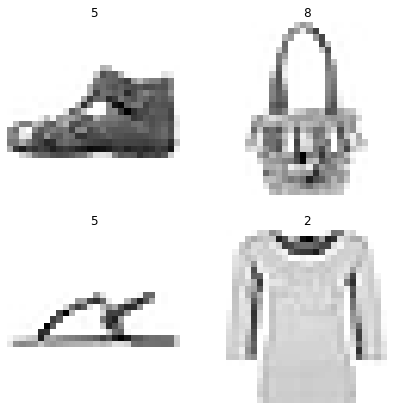

In [51]:
# Plot multiple random images of fashion MNIST
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(my_train_data)))
  plt.imshow(my_train_data[rand_index], cmap=plt.cm.binary)
  plt.title(my_train_labels[rand_index])
  plt.axis(False) 

In [40]:
# normalize
my_train_data = my_train_data / 255.0
my_test_data = my_test_data / 255.0

Знайдемо ідеальну швидкість навчання

Epoch 1/40
563/563 [==============================] - 2s 3ms/step - loss: 0.5312 - accuracy: 0.8410 - val_loss: 0.0934 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9814 - val_loss: 0.0611 - val_accuracy: 0.9830 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0564 - accuracy: 0.9854 - val_loss: 0.0530 - val_accuracy: 0.9837 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9862 - val_loss: 0.0452 - val_accuracy: 0.9877 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0463 - val_accuracy: 0.9867 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0448 - val_accuracy: 0.9880 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - lo

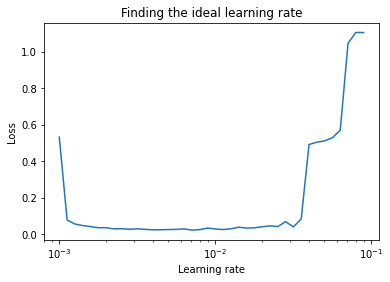

In [53]:
# creating a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

find_lr_history = model.fit(my_train_data,
                    my_train_labels,
                    epochs=40,
                    validation_data=(my_test_data, my_test_labels),
                    callbacks=[lr_scheduler])

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


Навчимо модень використовуючи отримане оптимальне значення - 0.007

In [55]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.0071),
                 metrics=["accuracy"])


find_lr_history = model.fit(my_train_data,
                    my_train_labels,
                    epochs=20,
                    validation_data=(my_test_data, my_test_labels))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 2ms/step - loss: 0.3591 - accuracy: 0.9093 - val_loss: 0.1438 - val_accuracy: 0.9587
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9802 - val_loss: 0.0866 - val_accuracy: 0.9827
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0607 - accuracy: 0.9853 - val_loss: 0.0725 - val_accuracy: 0.9810
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9857 - val_loss: 0.0793 - val_accuracy: 0.9790
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9856 - val_loss: 0.0672 - val_accuracy: 0.9840
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9881 - val_loss: 0.0681 - val_accuracy: 0.9867
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9875 - val_loss: 0.0678 - val_accuracy: 0.9803
Epoch 8/20
563/56

Побудуємо Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
# Make predictions with model
y_probs = model.predict(my_test_data) 
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
print(y_preds[:10])

confusion_matrix(y_true=my_test_labels, 
                 y_pred=y_preds)

[2 5 5 2 8 2 5 8 8 8]


array([[992,   1,   7],
       [  0, 999,   1],
       [ 18,  11, 971]])

#Висновок
В даній лобораторній роботі було розглянуто вирішення задачі багатокласової класифікаціїї за допомогою нейронної мережі з використанням Flatten & Dense layers.